# Mollie Panter-Downes’ wartime stories: Territory Free of War 

### Text Extraction and Processing

The text was extratced from scanned pages of the following edition:
Panter-Downes, Mollie. Good Evening, Mrs Craven: The Wartime Stories of Mollie Panter-Downes. Edited by Gregory Lestage. Reprinted. Persephone Classics. London: Persephone Books, 2008.
After the deliting the title page, Lestage's *Preface* and *Afterword*, table of content and two Letters from London (Panter-Downes' journalism), the text was OCR'ed (optical character recognition) with Tesseract tool. Txt-file of the 21 short stories were placed in a folder.

### Extracting basic statistical metrics of the collection

In [164]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

The code for this extraction  is written in class TextAnalyzer, placed in a separate file.
TextAnalizer in severals methods can output:
1. list of tokenized words
2. number of words
3. average word length
4. list of sentence tokens
5. number of sentences
6. average sentence length in words
7. text, splitted into paragraphs
8. number of paragraphs
9. average paragraph length in words
10. average paragraph length in sentences
11. scores of VADER sentiment analysis of a text
12. list of lemmatized text's tokens
13. list of unique words
14. number of unique words
15. draw a plot of compound sentiment of a text
16. list of the mentioned above statistical metrics for text's compound table


In [165]:
from textanalyzer import TextAnalyzer, metrics

Reading txt files and extracting the statistical metrics

In [166]:
titles = os.listdir('Good Evening, Mrs. Craven texts')
ordered_titles = sorted(titles, key=lambda t: int(t.split('. ')[0]))
all_texts_as_str = []
file_w = open ('table data\\text metrics.csv', mode = 'w', encoding='utf-8')
file_writer = csv.writer(file_w, delimiter = ";", lineterminator="\r")
file_writer.writerow(['title','number of words', 'number of sentences',
                    'number of unique words', 'number of paragraphs',
                    'average word length', 'average sentence length',
                    'average paragraph length in sentences',
                    'average paragraph length in words',
                    'sentiment negative', 'sentiment neutral',
                    'sentiment positive', 'sentiment compound'])
for title in tqdm(ordered_titles):
    f = open (f'Good Evening, Mrs. Craven texts/{title}', encoding='utf-8')
    short_story = f.read()
    all_texts_as_str.append(short_story)
    text_metrics = metrics(short_story)
    text_metrics.insert(0, title[:-4])
    file_writer.writerow(text_metrics)
    f.close()
file_w.close()

100%|██████████| 21/21 [00:05<00:00,  3.58it/s]


In [167]:
titles_for_graphs = ["Date with Romance", "Meeting at the Pringles'", "Mrs. Ramsay's War", "In Clover", " It's the Real Thing...",
                     "This Flower, Safety", "As the Fruitful Vine", "Lunch with Mr. Biddle", "Battle of the Greeks",
                     "Fin de Siecle", "Literary Scandal...", "Goodbye, My Love", "War Among Strangers", "Combined Operations",
                     "Good Evening, Mrs. Craven", "The Hunger of Miss Burton", "It's the Reaction", "Cut down the Trees",
                     "Year of Decision", "The Danger", "The Waste of it All"]


We analyzed several key textual metrics listed below:
1. Number of words. This is a plain texts' length in word as it considered as any characters bondered with spaces. Contracted and conjugated forms are not count as separate words.
2. Number od sentences. Sentence is considered as a sequence of words completed with sentence end punctuation.
3. Number of unique words. Number of unique lemmatized tokens. In this count the indents of contracyed forms ('s, 'd, 're, etc.) are listed as individual words.
4. Number of paragraphs. Dialogue lines considered as independent paragraphs.
5. Average word length counted as number of characters in each word as token in (1).
6. Average sentence length counts as a number of words in sentence.
7. Average paragraph length in sentences. Number of sentences in each paragraph.
8. Average paragraph length in words. Number of words in each paragraph.
9. Sentiment negative, neutal (10), positive (11) and compound (12) are outcomes of NLTK-integrated VADER (Valence Aware Dictionary for sEntiment Reasoning).\
VADER is a model, presented in 2014 by Hutto and Gilbert, which is able to evaluate both polarity of sentiment (positive or negative) and its intensity (in numbers). Among two major existing approaches towards sentiment analysis, lexical and statistical models, VADER is dictionary based. It contains a dictionary of sentiment listing about 7500 lexical items evaluated in scale from -4 to +4 (slightly, moderately, very and extremely positive or negative or neutal - 0). In addition to the dictionary of sentiment VADER formulates 5 rules which consider facts in text, affecting on sentiment. For the total sentiment of the text VADER normalizes which limits the overall score in interval between -1 and 1. The total score of positive, negative and neutral sentiments is 1 and represents the sentiment of sentiment dictionary used in the analyzed text. Compound sentiment is "computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive)" [2].

The results for each short story are in compound table 

In [168]:
compound_table = pd.read_csv('table data\\text metrics.csv', index_col='title', sep=";")
compound_table

,number of words,number of sentences,number of unique words,number of paragraphs,average word length,average sentence length,average paragraph length in sentences,average paragraph length in words,sentiment negative,sentiment neutral,sentiment positive,sentiment compound
title,,,,,,,,,,,,
1. Date with Romance,1301,76,484,22,5.515757,17.118421,3.454545,59.136364,0.057,0.825,0.118,0.9978
2. Meeting at the Pringles',1624,85,518,36,5.487685,19.105882,2.361111,45.111111,0.075,0.821,0.104,0.9956
3. Mrs. Ramsay's War,1317,52,481,24,5.599089,25.326923,2.166667,54.875000,0.070,0.822,0.109,0.9937
4. In Clover,1669,66,563,21,5.517076,25.287879,3.142857,79.476190,0.094,0.789,0.117,0.9939
5. It's the Real Thing This Time,1281,45,517,9,5.442623,28.466667,5.000000,142.333333,0.100,0.790,0.110,0.9534
"6. This Flower, Safety",2043,81,714,24,5.641214,25.222222,3.375000,85.125000,0.085,0.818,0.097,0.9865
7. As the Fruitful Vine,1802,76,624,20,5.502775,23.710526,3.800000,90.100000,0.087,0.765,0.148,0.9988
8. Lunch with Mr. Biddle,2015,87,720,15,5.711166,23.160920,5.800000,134.333333,0.087,0.747,0.166,0.9996
9. Battle of the Greeks,1817,81,590,34,5.588332,22.432099,2.382353,53.441176,0.099,0.772,0.128,0.9957


Table of correlations

### Short Stories Length

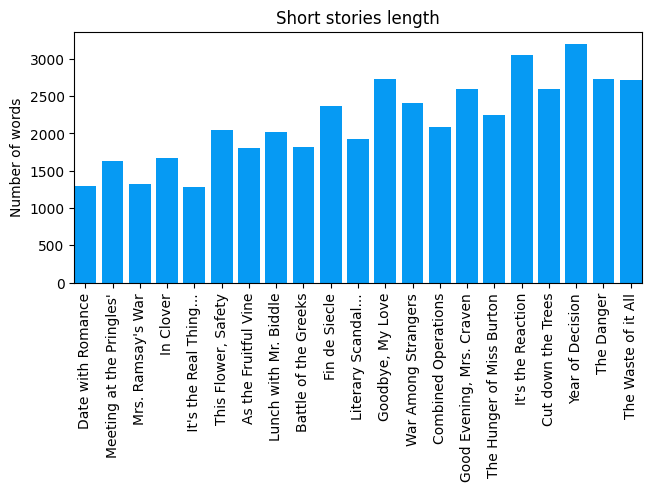

In [192]:
fig, ax = plt.subplots(constrained_layout=True)
ax.bar(titles_for_graphs, compound_table['number of words'], color='#069AF3')
plt.xticks(rotation=90)
ax.margins(x=0)
plt.ylabel('Number of words')
plt.title('Short stories length')
plt.savefig("figures\\short stories length.jpg", dpi=300)
plt.show()

Initially these short stories were written for *The New Yorker Magazine* which presupposed the format limitation as literary journals demand from their contributors (Harold Ross, magazine's editor, suggested her writing up to 1500 words, which in a paper edition was one spreadsheet with advertisment and illustrations). This considers that size of the short stories expected to be homogenous. The earliest pieces written at the first year of war and almost do not exceed 2000 words. However from the 9th-11th pieces (*Battle of the Greeks*, 8 March 1941; *Fin de Siecle*, 12 July 1941; *Literary Scandal at the Sewing Party*, 6 September 1941), all for 1941 M. Panter-Downes tends to be more colloquious and wordy. 
It is clear, that the initial size of a short story by the 1944 could not suffice her writing intentions, she needed more space to narrate the same typical plots.

### Words, Sentences & Paragraphs

However, paragraph length variations is explained by the ratio of dialogues (direct speech) in short stories. As dialogue lines significantly shorter that paragraphs of author's speech, the most "talkative" short stories have shorter paragraphs.

### Direct speech

From the scanned text we extracted the lines of direct speech. As the volume of texts is relatively unmassive and limited, we decided not to use regular expressions and implement direct speech extraction manually. For every short stories in the collection there is a file with lines of direct speech which is character's speech.

In [170]:
sh_st_direct_speech = [] 
for title in range(1,22):
    with open(f'direct speech/{title}.txt', encoding="utf-8") as f:
        text = f.read()
    sh_st_direct_speech.append(text)


In [171]:
new_compound_table = compound_table.copy()

In [172]:
direct_speech_w_length = [] 
for story in sh_st_direct_speech:
    text = TextAnalyzer(story)
    direct_speech_w_length.append(text.text_number_of_words())
table_with_d_speech = new_compound_table
table_with_d_speech['Length of direct speech'] = direct_speech_w_length
table_with_d_speech['Percentage of direct speech'] = table_with_d_speech['Length of direct speech'] / table_with_d_speech['number of words'] * 100

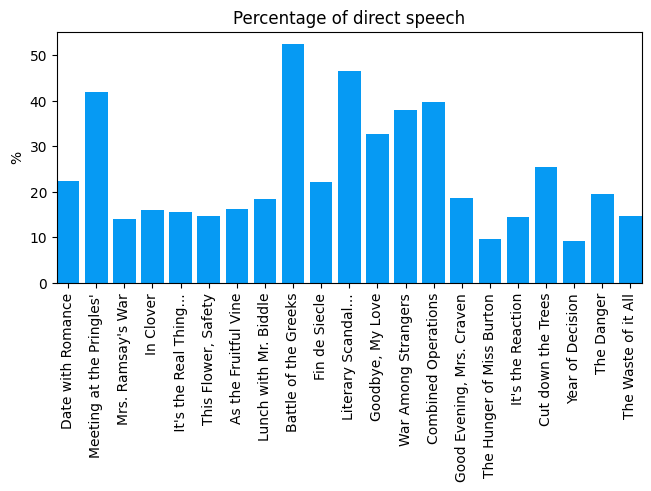

In [193]:
fig, ax = plt.subplots(constrained_layout=True);
ax.bar(titles_for_graphs, table_with_d_speech['Percentage of direct speech'], color='#069AF3')
plt.xticks(rotation=90)
ax.margins(x=0)
plt.ylabel('%')
plt.title('Percentage of direct speech')
plt.savefig("figures\\percentage of direct speech.jpg", dpi=300)
plt.show()

The highest share of direct speech, unsurprisingly, belongs to the "sewing party" trilogy which include also the highest number of major (with direct speech) characters.

In [174]:
direct_speech_neg_sentiment = []
for story in sh_st_direct_speech:
    text = TextAnalyzer(story)
    sentiment = text.text_total_sentiment()
    direct_speech_neg_sentiment.append(sentiment['neg'])
table_with_d_speech['Negative sentiment of direct speech'] = direct_speech_neg_sentiment
table_with_d_speech

,number of words,number of sentences,number of unique words,number of paragraphs,average word length,average sentence length,average paragraph length in sentences,average paragraph length in words,sentiment negative,sentiment neutral,sentiment positive,sentiment compound,Length of direct speech,Percentage of direct speech,Negative sentiment of direct speech
title,,,,,,,,,,,,,,,
1. Date with Romance,1301,76,484,22,5.515757,17.118421,3.454545,59.136364,0.057,0.825,0.118,0.9978,291,22.367410,0.029
2. Meeting at the Pringles',1624,85,518,36,5.487685,19.105882,2.361111,45.111111,0.075,0.821,0.104,0.9956,679,41.810345,0.056
3. Mrs. Ramsay's War,1317,52,481,24,5.599089,25.326923,2.166667,54.875000,0.070,0.822,0.109,0.9937,183,13.895216,0.108
4. In Clover,1669,66,563,21,5.517076,25.287879,3.142857,79.476190,0.094,0.789,0.117,0.9939,265,15.877771,0.044
5. It's the Real Thing This Time,1281,45,517,9,5.442623,28.466667,5.000000,142.333333,0.100,0.790,0.110,0.9534,198,15.456674,0.146
"6. This Flower, Safety",2043,81,714,24,5.641214,25.222222,3.375000,85.125000,0.085,0.818,0.097,0.9865,297,14.537445,0.037
7. As the Fruitful Vine,1802,76,624,20,5.502775,23.710526,3.800000,90.100000,0.087,0.765,0.148,0.9988,291,16.148724,0.068
8. Lunch with Mr. Biddle,2015,87,720,15,5.711166,23.160920,5.800000,134.333333,0.087,0.747,0.166,0.9996,370,18.362283,0.071
9. Battle of the Greeks,1817,81,590,34,5.588332,22.432099,2.382353,53.441176,0.099,0.772,0.128,0.9957,954,52.504128,0.114


### Characters 

Panter-Downes short stories are oversaturated with characters, both main (speaking) and secondary (only mentioned in text). The list of that characters were compiled manualy (without using Named Entity Recognition which can identify places' names and people's names automatically, as the set of text was rather small). Also all characters were marked as men, women, children, or men and women of it was named as family couple, but the number of this entries insignificant.


In [175]:
lines = []
main_characters = []
secondary_characters = []
number_of_characters = []
female_characters = []
male_characters = []
female_main = []
male_main = []
female_secondary = []
male_secondary = []
children_characters = []
MF_characters = []
characters = []

with open ("characters' names.txt") as f:
    lines = f.read()
lines = lines.split('\n')
for line in lines:
    female_characters.append(line.count("(F)"))
    male_characters.append(line.count("(M)"))
    children_characters.append(line.count('(CH)'))
    MF_characters.append(line.count('(MF)'))
    subline = line.split(': ')
    characters.append(subline[1])
    line_characters = subline[1].split('; ')
    line_main_characters = line_characters[0]
    line_sec_characters = line_characters[1]
    female_main.append(line_main_characters.count("(F)"))
    male_main.append(line_main_characters.count('(M)'))
    main_characters.append(line_main_characters.split(', '))
    secondary_characters.append(line_sec_characters.split(', '))
    female_secondary.append(line_sec_characters.count('(F)'))
    male_secondary.append(line_sec_characters.count('(M)'))

Main characters

In [176]:
main_characters

[['(F) Helen Ramsay', '(M) Mr. Gerald Spalding'],
 ['(F) Ms. Lois Pringle',
  '(F) Ms. Alice Pringle',
  '(F) Mrs. Taylor',
  '(F) Mrs. Peake',
  '(F) Ms. Lois Craddock',
  '(F) Mrs. Doris Carver'],
 ['(F) Mrs. Ramsay', '(F) Mrs. Susan Ramsay', ' (F) Mrs. Parmenter'],
 ['(F) Miss Vereker',
  '(F) Mrs. Clark',
  '(F) Mrs. Fletcher',
  '(F) Mrs. Clark',
  '(M) Captain Fletcher',
  '(M) Mr. Clark'],
 ['(M) Major Gerald Marriot', '(F) Miss Marriot', '(F) Mrs. Trent'],
 ['(F) Miss Mildred Ewing',
  '(F) Sparks',
  '(F) Mrs. Prentiss',
  '(F) Miss Challoner',
  "(M) Miss Ewing's nephew"],
 ['(F) Lucy Grant',
  '(M) Philip Grant',
  "(F) Lucy's mother",
  '(F) Valerie',
  '(M) Bernard',
  '(F) Monica',
  '(M) The bus conductor'],
 ['(M) Winthrop Biddle',
  '(F) Mme. Delacroix',
  '(F) Mrs. Maverick',
  '(F) Effie Trumpington',
  '(F) Dora Cunningham',
  '(M) General Sysonby',
  '(F) Ursula Farmer',
  '(F) Mrs. Sysonby',
  '(M) Mr. Potts',
  '(M) Carter',
  '(M) Gardener'],
 ['(F) Mrs. Ramsay'

Table of Characters

In [177]:
characters_table = pd.DataFrame()
characters_table['titles'] = ordered_titles
characters_table['number of main characters'] = [len(item) for item in main_characters]
characters_table['among them women'] = female_main
characters_table['number of mentioned characters'] = [len(item) for item in secondary_characters]
characters_table['...among them women'] = female_secondary
characters_table['...among them men'] = male_secondary
characters_table['all characters'] = characters_table['number of main characters'] + characters_table['number of mentioned characters']
characters_table['number of female characters'] = female_characters
characters_table['number of male characters'] = male_characters
characters_table

,titles,number of main characters,among them women,number of mentioned characters,...among them women,...among them men,all characters,number of female characters,number of male characters
0,1. Date with Romance.txt,2,1,4,3,1,6,4,2
1,2. Meeting at the Pringles'.txt,6,6,5,3,1,11,9,1
2,3. Mrs. Ramsay's War.txt,3,3,6,2,4,9,5,4
3,4. In Clover.txt,6,4,4,1,2,10,5,4
4,5. It's the Real Thing This Time.txt,3,2,1,1,0,4,3,1
5,"6. This Flower, Safety.txt",5,4,2,1,1,7,5,2
6,7. As the Fruitful Vine.txt,7,4,4,1,2,11,5,5
7,8. Lunch with Mr. Biddle.txt,11,6,6,3,1,17,9,6
8,9. Battle of the Greeks.txt,8,7,3,0,3,11,7,4
9,10. Fin de Siecle.txt,4,1,11,3,7,15,4,10


Number of main characters

In [178]:
characters_table['number of main characters'].sum()

107

Number of secondary characters

In [179]:
characters_table['number of mentioned characters'].sum()

90

For 21 short stories this amount is rather significant, making them more like a chorus or a hive.

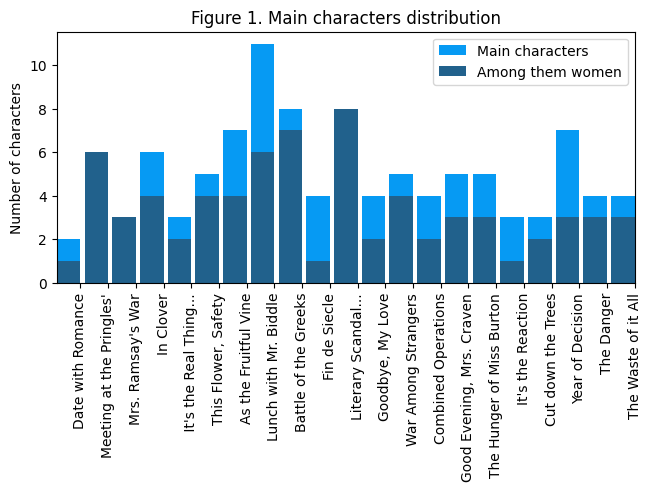

In [195]:
fig, ax = plt.subplots(constrained_layout=True)
bar_width = 0.85
colors = ['#069AF3', 'gray']

x = np.arange(len(titles_for_graphs))
rects1 = ax.bar(
    x - bar_width/2,
    characters_table['number of main characters'],
    width=bar_width,
    color=colors[0],
    label='Main characters'
)
rects2 = ax.bar(
    x - bar_width/2,
    characters_table['among them women'],
    width=bar_width,
    color='#21618c',
    #edgecolor='#069AF3',
    #hatch='////',
    label='Among them women'
)
ax.set_ylabel('Number of characters')
ax.set_title('Figure 1. Main characters distribution')
ax.set_xticks(x)
ax.set_xticklabels(titles_for_graphs)
ax.legend()

plt.xticks(rotation=90)
plt.margins(x=0)
plt.savefig("figures\\main characters distribution.jpg", dpi=300)
plt.show()


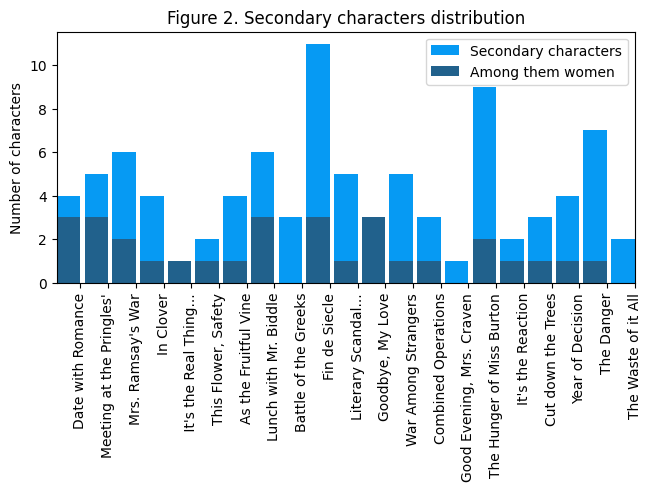

In [196]:
fig, ax = plt.subplots(constrained_layout=True)
bar_width = 0.85
colors = ['#069AF3', 'gray']

x = np.arange(len(titles_for_graphs))
rects1 = ax.bar(
    x - bar_width/2,
    characters_table['number of mentioned characters'],
    width=bar_width,
    color=colors[0],
    label='Secondary characters'
)
rects2 = ax.bar(
    x - bar_width/2,
    characters_table['...among them women'],
    width=bar_width,
    color='#21618c',
    #edgecolor='#069AF3',
    #hatch='////',
    label='Among them women'
)
ax.set_ylabel('Number of characters')
ax.set_title('Figure 2. Secondary characters distribution')
ax.set_xticks(x)
ax.set_xticklabels(titles_for_graphs)
ax.legend()

plt.xticks(rotation=90)
plt.margins(x=0)
plt.savefig("figures\\secondary characters distribution.jpg", dpi=300)
plt.show()

Even without statical overview, just reading the short stories we mention that women are the major actors of Panter-Downes' short stories. The more peculiar fact is that male characters were "exiled" to backstage, having occupied the secondary roles.

### Sentiment of short stories

My hypothesis was that Panter-Downes protects her characters by war effect, taking on herself the burden to express negative emotions from the shoulders of her characters. The sufficient case is that negative sentiment of text in average will be in absolute value higher than the negative sentiment of characters speech, i.e. characters will be less negative than the text in average.


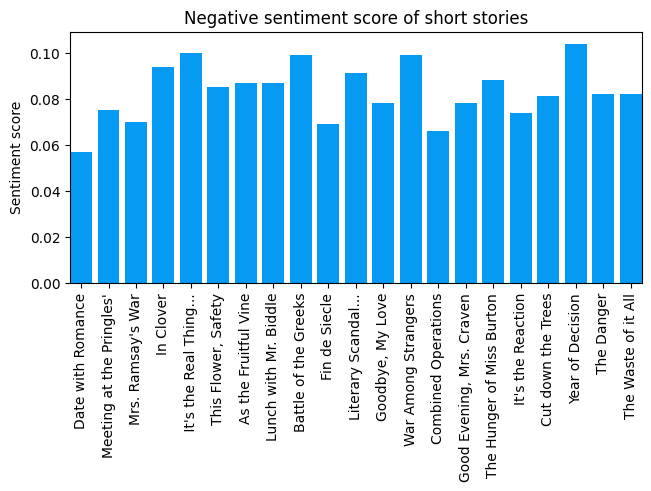

In [197]:
fig, ax = plt.subplots(constrained_layout=True)
ax.bar(titles_for_graphs, compound_table['sentiment negative'], color='#069AF3')
plt.xticks(rotation=90)
ax.margins(x=0)
plt.ylabel('Sentiment score')
plt.title('Negative sentiment score of short stories')
plt.savefig("figures\\negative sentiment of short stories.jpg", dpi=300)
plt.show()

Nevertheless, the length of Panter-Downes' sentences surprisingly correlates with negative sentiment score (cor = 0.56). Why when tonality towards war become more negative Panter-Downes' sentences lengthen? Whose sentences, of the author or her characters?\
In all short stories except for #13 *War among the Strangers* averall sentiment of the pieces is positive. And the fluctiations of negative sentiment (it is more picteresque if we look at negative-positive sentiment ratio), which is more important in defining the move of tonality for war literature, show that in the collection there are three flows of intensifying negative sentiment from 1 to 5, decline from 6 to 8, again growth from 9 to 13, abrupt fall and the initiation of the final wave of weak platauing sentiment intensification from 14 to 21, which suggests for criticism another approach to clustering short stories in the collection.
However, by the end of war, as the length of Panter-Downes short story was increasing, the more gloomy they were becoming, which is also evident without using specific tools

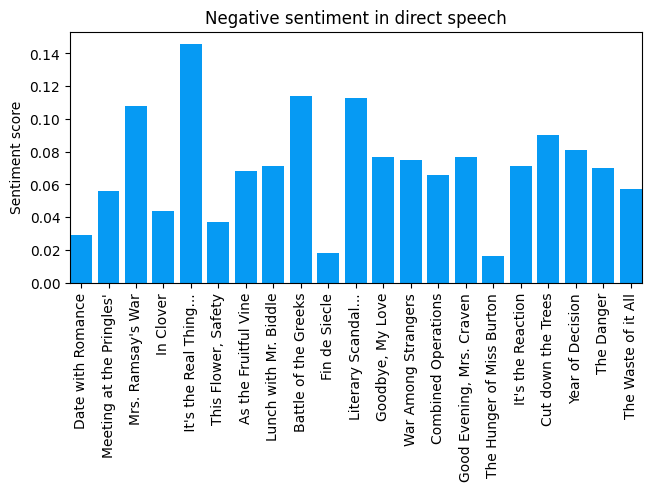

In [198]:
fig, ax = plt.subplots(constrained_layout=True);
ax.bar(titles_for_graphs, table_with_d_speech['Negative sentiment of direct speech'], color='#069AF3')
plt.xticks(rotation=90)
ax.margins(x=0)
plt.ylabel('Sentiment score')
plt.title('Negative sentiment in direct speech')
plt.savefig("figures\\negative sentiment in direct speech.jpg", dpi=300)
plt.show()

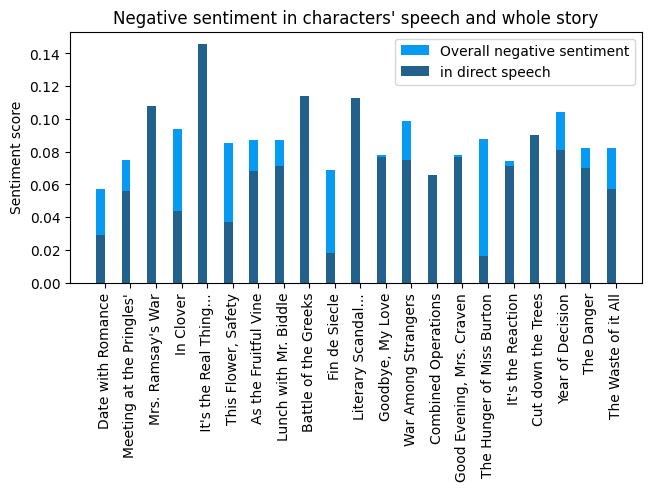

In [184]:
fig, ax = plt.subplots(constrained_layout=True)
bar_width = 0.35
colors = ['#069AF3', 'gray']

x = np.arange(len(titles_for_graphs))
rects1 = ax.bar(
    x - bar_width/2,
    compound_table['sentiment negative'],
    width=bar_width,
    color=colors[0],
    label='Overall negative sentiment'
)
rects2 = ax.bar(
    x - bar_width/2,
    table_with_d_speech['Negative sentiment of direct speech'],
    width=bar_width,
    color='#21618c',
    #edgecolor='#069AF3',
    #hatch='////',
    label='in direct speech'
)
ax.set_ylabel("Sentiment score")
ax.set_title("Negative sentiment in characters' speech and whole story")
ax.set_xticks(x)
ax.set_xticklabels(titles_for_graphs)
ax.legend()

plt.xticks(rotation=90)
plt.show()

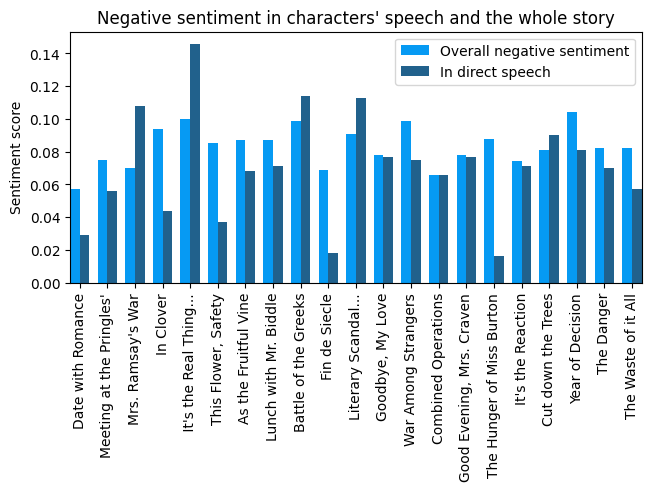

In [185]:
fig, ax = plt.subplots(constrained_layout=True)

bar_width = 0.35

colors = ['#069AF3', 'gray']

x = np.arange(len(titles_for_graphs))

rects1 = ax.bar(
    x - bar_width / 2,
    compound_table['sentiment negative'],
    width=bar_width,
    color=colors[0],
    label='Overall negative sentiment'
)

x2 = [xi + bar_width / 2 for xi in x]
rects2 = ax.bar(
    x2,
    table_with_d_speech['Negative sentiment of direct speech'],
    width=bar_width,
    color='#21618c',
    label='In direct speech'
)

ax.set_ylabel("Sentiment score")
ax.set_title("Negative sentiment in characters' speech and the whole story")
ax.set_xticks(x)
ax.set_xticklabels(titles_for_graphs)
ax.legend()

plt.xticks(rotation=90)
plt.margins(x=0)
plt.show()

In [186]:
corpus_df = pd.read_excel(r"C:\Users\Artem\Documents\my python projects\MPD\table data\Panter-Downes's collection.xlsx")
sentiments_ds = list(corpus_df["Sentiment of Direct Speech"])
sentiments_as = list(corpus_df["Sentiment of Author\'s Speech"])
sentiment_difference = list(corpus_df["Sentiment difference (average)"])
corpus_df

,Title,Author,Gender,Date,Type,Length (in words),Number of male characters,Number of female characters,Number of unknown characters,Female-Male characters ratio,Whole text sentiment,STD (Whole text sen timent),Sentiment of Direct Speech,STD (Direct Speech Sentiment),Sentiment of Author's Speech,STD (Author's Speech Sentiment),Sentiment difference (average),Sentiment difference (corrected)
0,1. Date with Romance.txt,Mollie Panter-Downes,F,1939-1924,Panter-Downes's collection,1553,2,7,4,0.777778,0.111225,0.351769,0.146730,0.353163,0.069256,0.331875,0.077474,0.696553
1,10. Fin de Siecle.txt,Mollie Panter-Downes,F,1939-1925,Panter-Downes's collection,2783,12,4,5,0.250000,0.074277,0.328492,0.032849,0.298978,0.061771,0.354909,-0.028922,-0.389379
2,11. Literary Scandal at the Sewing Party.txt,Mollie Panter-Downes,F,1939-1926,Panter-Downes's collection,2304,7,10,5,0.588235,0.001400,0.415786,-0.085290,0.384965,0.040232,0.361643,-0.125522,-89.658333
3,"12. Goodbye, My Love.txt",Mollie Panter-Downes,F,1939-1927,Panter-Downes's collection,3322,6,3,4,0.333333,-0.009240,0.411133,0.067463,0.434155,-0.006889,0.378686,0.074353,8.046464
4,13. War Among Strangers.txt,Mollie Panter-Downes,F,1939-1928,Panter-Downes's collection,2905,7,7,6,0.500000,-0.032945,0.405491,0.049962,0.371947,-0.074239,0.414320,0.124201,3.769948
5,14. Combined Operations.txt,Mollie Panter-Downes,F,1939-1929,Panter-Downes's collection,2474,4,5,3,0.555556,0.082682,0.363861,0.107464,0.367843,0.084828,0.336889,0.022637,0.273778
6,"15. Good Evening, Mrs. Craven.txt",Mollie Panter-Downes,F,1939-1930,Panter-Downes's collection,3030,4,4,2,0.500000,0.119752,0.430191,0.191347,0.362119,0.103293,0.425961,0.088053,0.735301
7,16. The Hunger of Miss Burton.txt,Mollie Panter-Downes,F,1939-1931,Panter-Downes's collection,2603,4,5,4,0.555556,0.058116,0.428535,-0.001359,0.449965,0.069241,0.390725,-0.070600,-1.214821
8,17. It's the Reaction.txt,Mollie Panter-Downes,F,1939-1932,Panter-Downes's collection,3569,6,6,7,0.500000,0.054359,0.398341,0.112722,0.477167,0.039389,0.365282,0.073333,1.349052
9,18. Cut down the Trees.txt,Mollie Panter-Downes,F,1939-1933,Panter-Downes's collection,3031,3,8,3,0.727273,0.060833,0.418003,0.083115,0.435876,0.053565,0.375671,0.029550,0.485753


In [187]:
sorted_difference = sorted(sentiment_difference)
sentiments_ds = list(corpus_df["Sentiment of Direct Speech"])
sentiments_as = list(corpus_df["Sentiment of Author\'s Speech"])
sentiment_difference = list(corpus_df["Sentiment difference (average)"])

In [188]:
sorted_as, sorted_ds, sorted_titles = [], [], []
for item in sorted_difference:
    index = sentiment_difference.index(item)
    sorted_as.append(sentiments_as[index]); sorted_ds.append(sentiments_ds[index]); sorted_titles.append(titles_for_graphs[index])

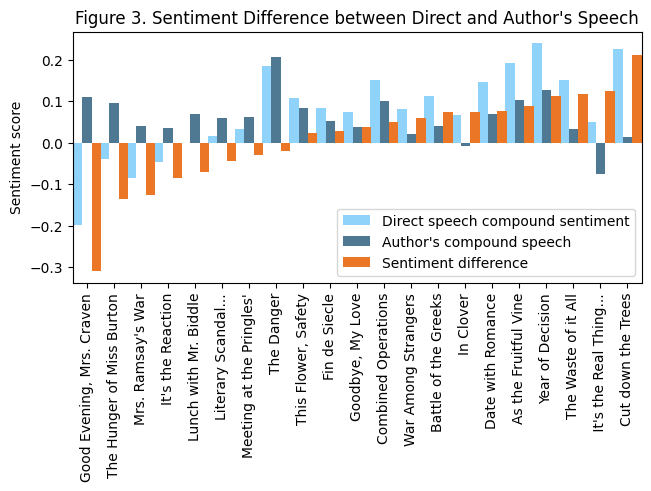

In [202]:
fig, ax = plt.subplots(constrained_layout=True)

bar_width = 0.35

colors = ['#069AF3', 'gray']

x = np.arange(len(titles_for_graphs))

rects1 = ax.bar(
    x - bar_width,
    sorted_ds,
    width=bar_width,
    color='#8FD3FB',
    label='Direct speech compound sentiment'
)

rects2 = ax.bar(
    x,
    sorted_as,
    width=bar_width,
    color="#4F7893",
    label='Author\'s compound speech'
)

rects3 = ax.bar(
    x + bar_width,
    sorted_difference,
    width=bar_width,
    color="#EB7625",
    label='Sentiment difference'
)

ax.set_ylabel("Sentiment score")
ax.set_title("Figure 3. Sentiment Difference between Direct and Author's Speech")
ax.set_xticks(x)
ax.set_xticklabels(sorted_titles)
ax.legend()

plt.xticks(rotation=90)
plt.margins(x=0)
plt.savefig("figures\\sentiment difference between direct and author speech.jpg", dpi=300)
plt.show()
